In [1]:
! pip install requests
! pip install plotly
! pip install pandas
! pip install pprint
! pip install matplotlib

You should consider upgrading via the 'pip install --upgrade pip' command.
You should consider upgrading via the 'pip install --upgrade pip' command.
You should consider upgrading via the 'pip install --upgrade pip' command.
You should consider upgrading via the 'pip install --upgrade pip' command.
     |████████████████████████████████| 13.1MB 33.6MB/s eta 0:00:01   |███▏                            | 1.3MB 5.5MB/s eta 0:00:03     |██████▎                         | 2.6MB 5.5MB/s eta 0:00:02     |████████▌                       | 3.5MB 5.5MB/s eta 0:00:02     |█████████████                   | 5.3MB 5.5MB/s eta 0:00:02     |███████████████▎                | 6.3MB 5.5MB/s eta 0:00:02     |██████████████████              | 7.4MB 5.5MB/s eta 0:00:02     |████████████████████            | 8.2MB 5.5MB/s eta 0:00:01     |█████████████████████           | 8.6MB 5.5MB/s eta 0:00:01     |█████████████████████████▏      | 10.4MB 33.6MB/s eta 0:00:01     |████████████████████████████    | 11.5MB 3

In [2]:
import requests
import plotly.express as px
import plotly
from plotly.offline import iplot
import pandas as pd
import pprint
import ctdcQueries as ctdc
import matplotlib

In [3]:
#General query interface
def runQuery(query):
    
    endpoint = "https://trialcommons-dev.cancer.gov/v1/graphql/"
    
    request = requests.post(endpoint, json={'query': query})
    
    if request.status_code == 200:
        return request.json()
    else:
        raise Exception("Query failed code {}. {}".format(request.status_code,query))

In [4]:
def geneParse(array, dictionary):
    for item in array:
        gene = item['gene']
        if gene in dictionary.keys():
            dictionary[gene] = dictionary[gene] + 1
        else:
            dictionary[gene] = 1
    return dictionary

In [5]:
def fuseParse(array, dictionary):
    for item in array:
        genes = []
        genes.append(item['gene1'])
        genes.append(item['gene2'])
        for gene in genes:
            if gene in dictionary.keys():
                dictionary[gene] = dictionary[gene] + 1
            else:
                dictionary[gene] = 1
        return dictionary

In [6]:
def varParse(json):
    #Pulls out the genes in the various catgories
    delins_final = {}
    indel_final = {}
    snv_final = {}
    fusion_final = {}
    copy_final = {}
    
    reports = json['data']['variant_report']
    for report in reports:
        fusions = report['gene_fusion_variants']
        fuseParse(fusions, fusion_final)
        
        snvs = report['snv_variants']
        geneParse(snvs, snv_final)
        
        indels = report['indel_variants']
        geneParse(indels, indel_final)
        
        delins = report['delins_variants']
        geneParse(delins, delins_final)
        
        copies = report['copy_number_variants']
        geneParse(copies, copy_final)
        
    full_final = {'delins':delins_final, 'indel':indel_final, 'snv': snv_final, 'fusion':fusion_final, 'copy':copy_final}
        
    return full_final


In [7]:
def dataPull():
    ctdc.init()
    
    jsondata = runQuery(ctdc.mutant_genes)
    
    genedata = varParse(jsondata)
    
    df = pd.DataFrame(genedata)
    
    return df
    

In [8]:
df = dataPull()
pprint.pprint(df)

         delins  indel  snv  fusion  copy
TP53        1.0    NaN  2.0     NaN   NaN
KRAS        3.0    NaN  1.0     NaN   NaN
BRAF        1.0    NaN  1.0     NaN   NaN
APC         NaN    4.0  NaN     NaN   NaN
PIK3R1      NaN    2.0  NaN     NaN   NaN
BRCA2       NaN    2.0  NaN     NaN   NaN
FBXW7       NaN    2.0  NaN     NaN   NaN
TET2        NaN    NaN  3.0     NaN   NaN
PPP2R1A     NaN    NaN  1.0     NaN   NaN
NRAS        NaN    NaN  2.0     NaN   NaN
PIK3CA      NaN    NaN  2.0     NaN   1.0
RB1         NaN    NaN  1.0     NaN   NaN
TMPRSS2     NaN    NaN  NaN     4.0   NaN
ERG         NaN    NaN  NaN     4.0   NaN
MET         NaN    NaN  NaN     2.0   NaN
RBPMS       NaN    NaN  NaN     1.0   NaN
NTRK3       NaN    NaN  NaN     1.0   NaN
FGFR3       NaN    NaN  NaN     2.0   NaN
TACC3       NaN    NaN  NaN     2.0   NaN
ERBB2       NaN    NaN  NaN     NaN   3.0
LYN         NaN    NaN  NaN     NaN   1.0
EGFR        NaN    NaN  NaN     NaN   2.0
FGF3        NaN    NaN  NaN     Na

In [18]:
def barChart():
    df = dataPull()
    
    df.plot(kind = 'bar', figsize=(10,12))

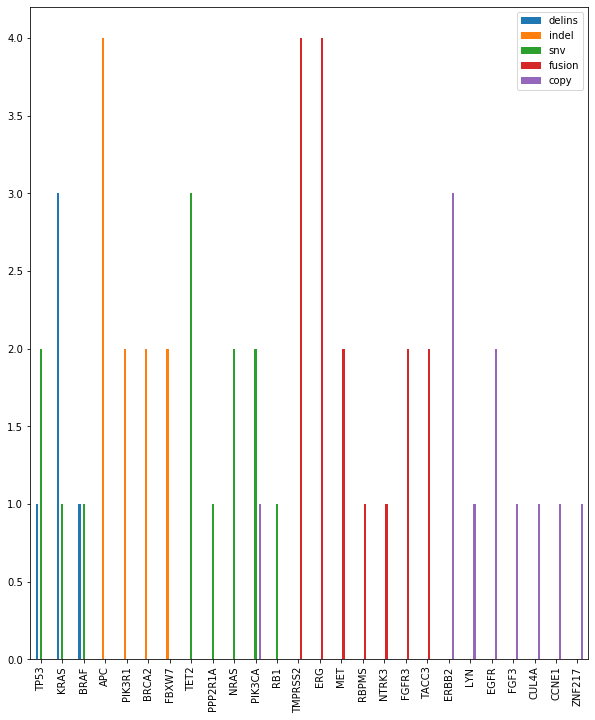

In [19]:
barChart()